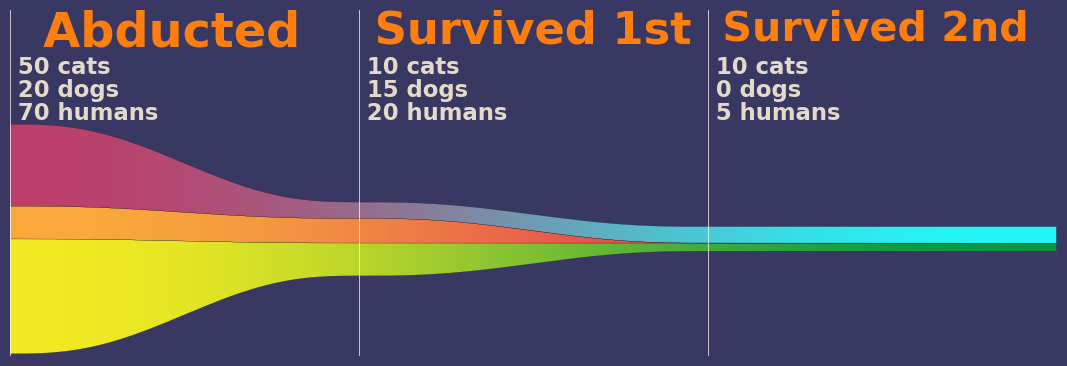

In [2]:
import matplotlib.pyplot as plt
from src.funel_graph import FunelGraph
colors = [
    ['#C33764', '#1BFFFF'],['#FBB03B', '#D4145A'],
    ['#FCEE21', '#009245'],['#1BFFFF', '#e05153'],
    ['#009245', '#FCEE21']
    ]

fg = FunelGraph()
fg.prepare()
fg.draw(colors=colors, visible=False, axesQ=False)
plt.savefig('data\example.png')
plt.show()

In [25]:
fg.data_dict

{'graph_data': array([[50, 10, 10],
        [20, 15,  5],
        [70, 20,  5]], dtype=int64),
 'data_labels': ['Initial', 'Hold', 'Final'],
 'label_data': array([[' 50 cats', ' 10 cats', ' 10 cats'],
        [' 20 dogs', ' 15 dogs', ' 5 dogs'],
        [' 70 humans', ' 20 humans', ' 5 humans']], dtype='<U10'),
 'labels': ['  Abducted  ', ' Survived 1st ', ' Survived 2nd '],
 'colors': [<matplotlib.colors.LinearSegmentedColormap at 0x1b47fd6ce20>,
  <matplotlib.colors.LinearSegmentedColormap at 0x1b47c76f280>]}

In [ ]:
# backup

# Initial;Hold;Final;Afterlife
# 50  - Can't;10;10;5
# 20  - Win;15;5;0
# 70  - Them;50;15;5
# 20  - All;15;10;5

# Initial;Hold;Final;Afterlife
# 50;10;10;5
# 20;15;5;0
# 70;50;15;5
# 20;15;10;5

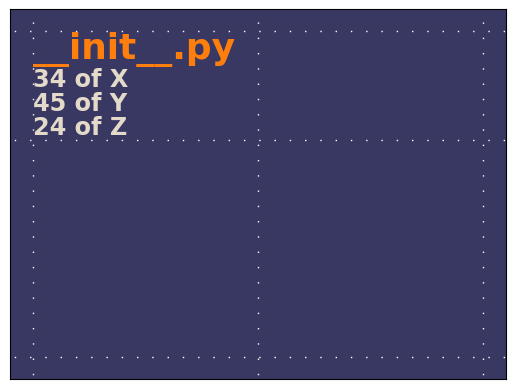

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.patches import Rectangle
from matplotlib.text import Annotation
from matplotlib.transforms import Bbox

title_kwargs = dict(
    size=15,
    color="tab:orange",
    va='top', ha='left',
    family='sans-serif',
    weight="bold",
    )

label_kwargs = dict(
    size=10,
    color='#e3dac9',
    va='top', ha='left',
    weight='bold', 
    family='sans-serif'
    )

def get_scale(text:Annotation, rect:Rectangle):
    """ # try to fit text to box

        import matplotlib.pyplot as plt
        from matplotlib.axes import Axes
        from matplotlib.patches import Rectangle
        from matplotlib.text import Annotation
        from matplotlib.transforms import Bbox

        def get_scale(ax:Axes, text:Annotation, rect:Rectangle):
            rect_Bbox:Bbox = rect.get_window_extent()
            text_Bbox:Bbox = text.get_window_extent()
            scale = min(rect_Bbox.height / text_Bbox.height,
                        rect_Bbox.width / text_Bbox.width)
            return scale

        fig, ax = plt.subplots()
        ax.set(xlim=(0, 2), ylim=(0, 2))
        golden = (1+5**0.5)/2
        ax.set_aspect(1/golden)

        x0, y0, x1, y1 = 0, 1, 1, 1.5 # those are figure coordinates 
        width, height= x1 - x0, y1 - y0

        rect = Rectangle((x0, y0), width, height, fc="none", ec="tab:blue", lw=1)
        ax.add_patch(rect)

        text = ax.annotate(text='Matplolib', xy=(0,0), xytext=(0,1), xycoords=rect,
                        ha="left", va="top",c='tab:orange')

        scale = get_scale(ax, text, rect)
        text.set_fontsize(text.get_fontsize()*scale)

        ax.hlines(y=[0,1], xmin=-1, xmax=4,linestyle=(0, (1, 10)))
        ax.vlines(x=[0,1], ymin=-1, ymax=4,linestyle=(0, (1, 10)))
        plt.show()
    """

    rect_Bbox:Bbox = rect.get_window_extent()
    text_Bbox:Bbox = text.get_window_extent()
    scale = min(rect_Bbox.height / text_Bbox.height,
                rect_Bbox.width / text_Bbox.width)
    return scale

def divide_according_to_ratios_and_quantities(
        length:float=2.0,
        strength:np.ndarray=np.array([0.5, 1/3]),
        number: np.ndarray=np.array([2, 3]),
        ):
    """ The use:
    
        import numpy as np
        import matplotlib.pyplot as plt

        X = divide_according_to_ratios_and_quantities(length=1, strength=np.array([0.5, 1/6]), number=np.array([2, 3]))
        Y = divide_according_to_ratios_and_quantities(length=1, strength=np.array([1/6, 0.5]), number=np.array([2, 5]))
        pts = np.array(np.meshgrid(X,Y)).T.reshape(-1,2)
        fig, ax = plt.subplots()
        ax.set(xlim=(-0.2,1.2),ylim=(-0.2,1.2))
        ax.set_aspect('equal')
        ax.scatter(*pts.T)
        plt.show()
    """
    total  = (strength * number).sum()
    ratios = (strength * number) / total
    dividers = np.cumsum(np.hstack(([0],ratios))*length)
    intervals = np.vstack((dividers[:-1],dividers[1:])).T
    # why +1? - linspace needs one more num to procude <number> of intervals
    res = np.hstack([
        np.linspace(*ep, number[i] + 1) 
         for i, ep in enumerate(intervals)
         ])
    return res

window_width = 1

window_height = 0.5
graph_height = 1

fig, ax = plt.subplots()
ax.set_facecolor('#393862')
# golden = (1+5**0.5)/2
# ax.set_aspect()
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.set(xlim=(-0.1, 2*window_width+0.1), ylim=(-0.1, 1 + window_height+ 0.1))
ax.hlines(y=[0, 1, 1.5], xmin=-1, xmax=3, lw=1, colors='w', linestyle=(0, (1, 10)))
ax.vlines(x=[0, 1, 2], ymin=-1, ymax=2, lw=1,colors='w', linestyle=(0, (1, 10)))

# future function arguments:
xx = 0

visible = False
titles = ['__init__.py']
labels =  ['34 of X', '45 of Y','24 of Z']
str_s = np.array([1.5, 1])
numbers_sum = '103'



starting_points = divide_according_to_ratios_and_quantities(
    length=window_height,
    strength=str_s,
    number=np.array([len(titles), len(labels)])
    )
anchors = 1 + window_height - starting_points
titles_anchors = anchors[:len(titles)+1]
labels_anchors = anchors[-len(labels)-1:]

def draw_from_anchors(ax:Axes, xx, string_list, width, anchors, above_or_below, edge_color, text_kwargs):
    """ puts string from string_list in places described by anchors
        find minimum scaling and scale the same """

# def draw_from_anchors(ax:Axes, xx, string_list, width, anchors, above_or_below, ec, text_kwargs):
#     """ puts string from string_list in places described by anchors
#         find minimum scaling and scale the same """
    annotations = []
    scales = []
    height = abs(above_or_below - anchors[0]) if len(anchors) == 1 else np.diff(anchors)[0]
    for i, string in enumerate(string_list):
        rect = Rectangle(xy = (xx, anchors[i]), 
                            width=width, height=height, 
                            fill=False, ec=edge_color,lw=0.5 ,ls='--',visible=visible)
        ax.add_patch(rect)
        annotations.append(ax.annotate(string, xy=(0,1), xytext=(0,1), xycoords=rect, **text_kwargs))
        scales.append(get_scale(annotations[-1], rect))
    scale = min(scales)
    for text in annotations:
        text:Annotation
        text.set_fontsize(text.get_fontsize() * scale)

draw_from_anchors(
    ax=ax,
    xx=xx,
    string_list=titles,
    width=1,
    anchors=titles_anchors,
    above_or_below=titles_anchors[0],
    edge_color='orange',
    text_kwargs=title_kwargs)

draw_from_anchors(
    ax=ax,
    xx=xx,
    string_list=labels,
    width=0.5,
    anchors=labels_anchors,
    above_or_below=titles_anchors[-1],
    edge_color='w',
    text_kwargs=label_kwargs)

plt.show()

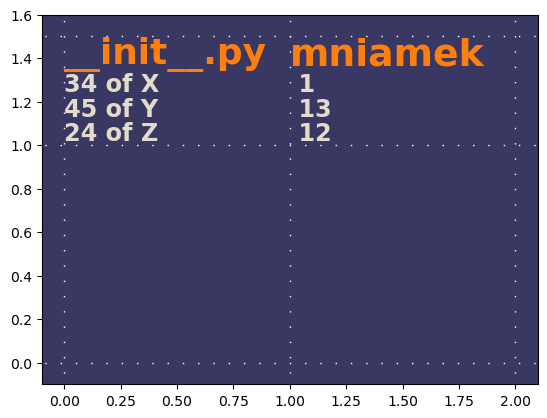

In [6]:
import numpy as np
import matplotlib.pyplot as plt

xx = 0
visible = False
titles = ['__init__.py']
labels =  ['34 of X', '45 of Y','24 of Z']
str_s = np.array([1.5, 1])
labels_sum = '103'

fig, ax = plt.subplots()
ax.set_facecolor('#393862')
# golden = (1+5**0.5)/2
# ax.set_aspect(1/golden)

ax.set(xlim=(-0.1, 2*window_width+0.1), ylim=(-0.1, 1 + window_height+ 0.1))
ax.hlines(y=[0, 1, 1.5], xmin=-1, xmax=3, lw=1, colors='w', linestyle=(0, (1, 10)))
ax.vlines(x=[0, 1, 2], ymin=-1, ymax=2, lw=1,colors='w', linestyle=(0, (1, 10)))

def draw_title_and_labels(
        ax=ax,
        xx=xx,
        titles=titles,
        labels=labels,
        title_vs_label_strength=str_s,
        labels_sum_sum=labels_sum
        ):
    starting_points = divide_according_to_ratios_and_quantities(
        length=window_height,
        strength=title_vs_label_strength,
        number=np.array([len(titles), len(labels)])
        )
    anchors = 1 + window_height - starting_points
    titles_anchors = anchors[:len(titles)+1]
    labels_anchors = anchors[-len(labels)-1:]

    draw_from_anchors(
        ax=ax,
        xx=xx,
        string_list=titles,
        width=1,
        anchors=titles_anchors,
        above_or_below=titles_anchors[0],
        edge_color='orange',
        text_kwargs=title_kwargs
        )

    draw_from_anchors(
        ax=ax,
        xx=xx,
        string_list=labels,
        width=0.5,
        anchors=labels_anchors,
        above_or_below=titles_anchors[-1],
        edge_color='w',
        text_kwargs=label_kwargs
        )
    
    return ax
draw_title_and_labels()
draw_title_and_labels(xx=1, titles=['mniamek'],labels =  [' 1', ' 13',' 12'])
plt.show()

In [6]:
from typing import List, Tuple

from matplotlib.axes import Axes
from matplotlib.patches import Rectangle
from matplotlib.text import Annotation

from src.text.text_anchors import produce_anchors

def draw_lists_of_strings(
    ax: Axes,
    xy: Tuple[float,float],
    width:float, 
    height:float,
    s_args:List[List[str]], 
    rel_str:List[float],
    font_kwargs:List[dict],
    visible = False
    ):
    """ On axis ax, in the bounding box:
            xy, width, height : parameters same as in matplotlib.patches.Rectangle
        draw(use annotate) strings from:
            s_args = [ titles:List[string], labels_0:List[string], labels_1:labels_0, ...]
        with relative sizes:
            rel_str = [titles_size:float, labels_0_size:float , labels_1_size:float, ...]
        each with keyword arguments:
            font_kwargs = [titles_annotate_kwargs:dict, labels_0_annotate_kwargs:dict, ...].
        
        visible: bool Set the rectangles artist's visibility
        


    Strings from <s_args>[i] are drawn with:
            <rel_size>[i mod len(rel__size)] size
            <font_kwargs>[i mod len(font_kwargs)] font kwargs
        Use cell:
            import matplotlib.pyplot as plt
            from src.text.config import title_kwargs, label_kwargs
            fig, ax = plt.subplots()
            ax.set_facecolor('#393862')
            ax.set(xlim=(-0.05,3),ylim=(-0.05, 1.55))
            rel_str = [2, 1]
            titles, labels = ['Title is'], ['twice', 'as big as','labels here']
            s_args = [titles, labels]
            font_kwargs = [title_kwargs, label_kwargs]
            draw_lists_of_strings(ax, (0,1), 1, 0.5, s_args, rel_str, font_kwargs, visible=False)
            plt.show()
    """
    def get_scale(text:Annotation, rect:Rectangle):
        rect_Bbox:Bbox = rect.get_window_extent()
        text_Bbox:Bbox = text.get_window_extent()
        scale = min(rect_Bbox.height / text_Bbox.height,
                    rect_Bbox.width / text_Bbox.width)
        return scale
    # sanity check:
    main_bounding_box = Rectangle(xy = xy, width=width, height = height, 
                    fill=False, ec='r', lw=1 ,ls='--', visible=visible)
    ax.add_patch(main_bounding_box)

    # draw from the top :
    start, stop = xy[1] + height, xy[1]
    assert len(s_args) == len(rel_str),\
        f"lengths of s_args (it is {len(s_args)}) should be same as rel_str (it is {len(rel_str)})"
    nums = list(map(len, s_args))
    anchors = produce_anchors(start, stop, rel_str=rel_str, nums=nums)
    for current_anchors, list_of_strings, text_kwargs in zip( anchors, s_args,font_kwargs):
        annotations = []
        scales = []
        for anchor, string in zip(current_anchors, list_of_strings):
            # print(f'string={string} between {anchor}')
            annotation = ax.annotate(string, (xy[0],anchor[0]), **text_kwargs)
            annotations.append(annotation)
            box = Rectangle(xy = (xy[0], anchor[1]), width=width, height = anchor[0]-anchor[1], 
                    fill=False, ec=text_kwargs['color'],lw=0.5 ,ls='--',visible=visible)
            ax.add_patch(box)
            scales.append(get_scale(annotation, box))
        scale = min(scales)
        for annotation in annotations:
            annotation:Annotation
            annotation.set_fontsize(annotation.get_fontsize() * scale)
    return ax

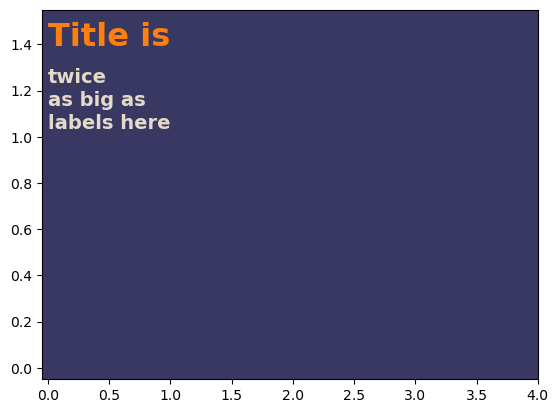

In [7]:
import matplotlib.pyplot as plt
from src.text.config import title_kwargs, label_kwargs
from src.text.text import draw_lists_of_strings
fig, ax = plt.subplots()
ax.set_facecolor('#393862')
ax.set(xlim=(-0.05, 4), ylim=(-0.05, 1.55))
rel_str = [2, 1]
titles, labels = ['Title is'], ['twice', 'as big as','labels here']
s_args = [titles, labels]
font_kwargs = [title_kwargs, label_kwargs]
draw_lists_of_strings(ax, (0,1), 1, 0.5, s_args, rel_str, font_kwargs, visible=False)
plt.show()